In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  

In [2]:
df = pd.read_csv('csv/gameandgrade.csv')

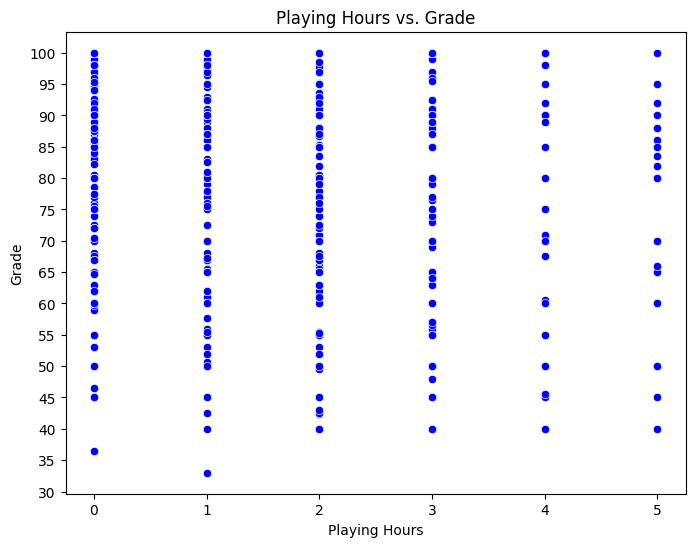

In [4]:
# Convert 'Grade' to numeric (if it's stored as a string)
df["Grade"] = pd.to_numeric(df["Grade"], errors="coerce")  # Convert to float

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Playing Hours"], y=df["Grade"], color="blue")
plt.xlabel("Playing Hours")
plt.ylabel("Grade")
plt.title("Playing Hours vs. Grade")

# Set y-axis ticks to multiples of 5
plt.yticks(range(int(df["Grade"].min())//5*5, int(df["Grade"].max())//5*5 + 5, 5))

plt.show()

In [5]:
x = df[["Playing Hours"]]  # Feature (independent variable)
y = df["Grade"]  # Target (dependent variable)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
print("Training Set:")
print(x_train)
print(y_train)

print("\nTesting Set:")
print(x_test)
print(y_test)


Training Set:
     Playing Hours
60               0
623              3
615              0
687              1
760              3
..             ...
71               2
106              0
270              0
435              2
102              1

[616 rows x 1 columns]
60      95.0
623    100.0
615    100.0
687     80.0
760     57.0
       ...  
71      70.0
106     72.5
270     70.0
435    100.0
102     70.0
Name: Grade, Length: 616, dtype: float64

Testing Set:
     Playing Hours
670              3
753              1
727              1
582              0
737              0
..             ...
356              0
535              2
369              0
247              3
470              0

[154 rows x 1 columns]
670     90.0
753    100.0
727     55.5
582     75.6
737     85.0
       ...  
356     76.0
535     68.0
369     85.0
247    100.0
470    100.0
Name: Grade, Length: 154, dtype: float64


In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [11]:
print(f"Intercept (b): {model.intercept_:.2f}")  # No indexing needed
print(f"Coefficient (m): {model.coef_[0]:.2f}")  # Use [0] to extract number

Intercept (b): 79.99
Coefficient (m): -1.68


In [14]:
y_pred = model.predict(x_test)

print("Any NaN in y_test:", y_test.isna().sum())
print("Any NaN in Y_pred:", pd.Series(y_pred).isna().sum())

Any NaN in y_test: 1
Any NaN in Y_pred: 0


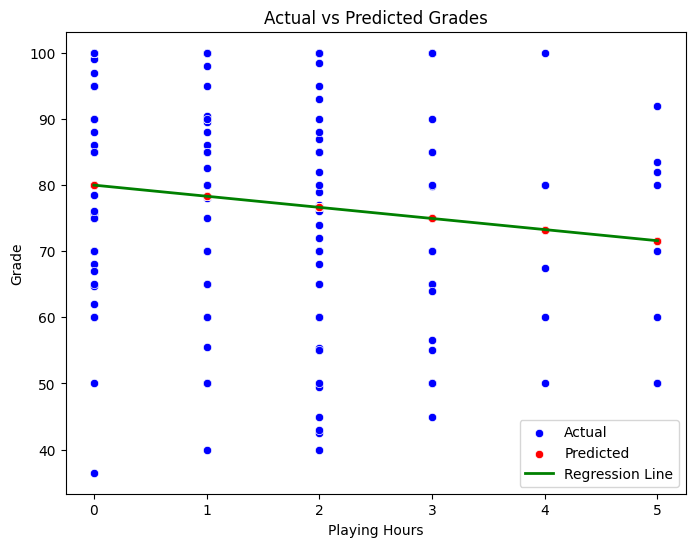

In [15]:
plt.figure(figsize=(8,6))

# Scatter plot of actual grades
sns.scatterplot(x=x_test.values.flatten(), y=y_test.values.flatten(), color="blue", label="Actual")

# Scatter plot of predicted grades
sns.scatterplot(x=x_test.values.flatten(), y=y_pred.flatten(), color="red", label="Predicted")

# Sort values to draw a proper line
sorted_indices = np.argsort(x_test.values.flatten())  # Sort X values
x_sorted = x_test.values.flatten()[sorted_indices]
y_sorted = y_pred.flatten()[sorted_indices]

# Plot regression line
plt.plot(x_sorted, y_sorted, color="green", linewidth=2, label="Regression Line")

plt.xlabel("Playing Hours")
plt.ylabel("Grade")
plt.title("Actual vs Predicted Grades")
plt.legend()
plt.show()

In [18]:
valid_indices = ~pd.isna(y_test) & ~pd.isna(y_pred)  # Keep only valid values
y_test = y_test[valid_indices]
y_pred = y_pred[valid_indices]

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 295.30
R² Score: 0.04


In [20]:
grade_variance = np.var(y_test)
print(f"Grade Variance: {grade_variance:.2f}")


Grade Variance: 308.89
